In [ ]:
import pandahouse

In [ ]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator'

}

In [ ]:
q = """
SELECT exp_group,
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM simulator_20230920.feed_actions
WHERE toDate(time) between  '2023-08-22'  and  '2023-08-28'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
2,8362,8362,8362,8362
3,8425,8425,8425,8425


In [ ]:
df.head(3)

,exp_group,user_id,likes,views,ctr
0,3,115383,38,248,0.153226
1,3,10326,24,132,0.181818
2,3,123580,25,122,0.204918


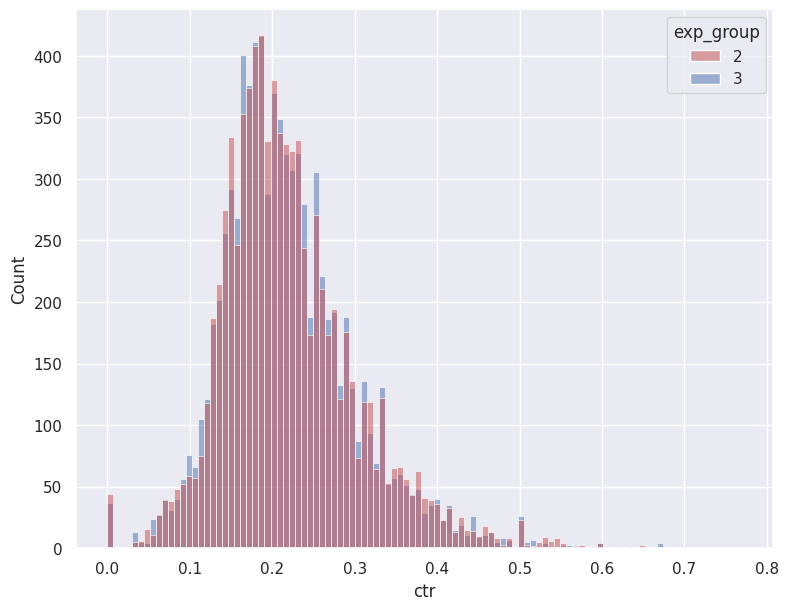

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(9, 7)})

groups = sns.histplot(data = df, x = 'ctr', hue = 'exp_group', palette = ['r', 'b'], alpha = 0.5, kde = False)

In [ ]:
from scipy import stats
stats.ttest_ind(df[df.exp_group == 2].ctr, df[df.exp_group == 3].ctr, equal_var = False)

TtestResult(statistic=0.6617303509169986, pvalue=0.508153138292614, df=16776.51227467491)

In [ ]:
p_values = []
for _ in range(10000):
  stat = stats.ttest_ind(random.sample(sorted(df[df.exp_group == 2].ctr.values), 500), random.sample(sorted(df[df.exp_group == 3].ctr.values), 500), equal_var = False)[1]
  p_values.append(stat)

<Axes: ylabel='Count'>

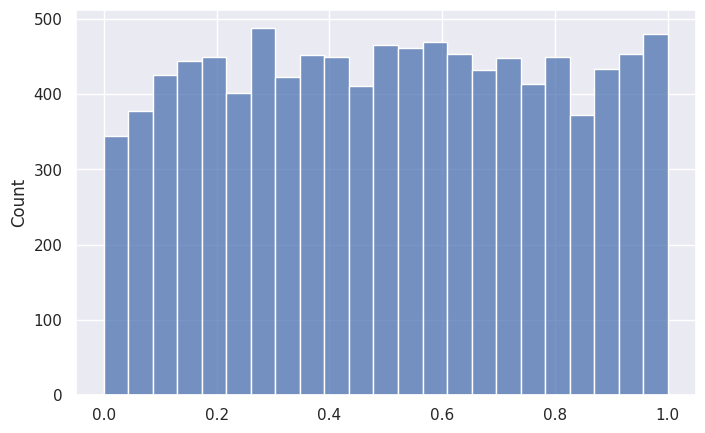

In [ ]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.histplot(data = p_values)

In [ ]:
print(f"p values оказался меньше либо равен 0.05 в таком проценте случаев: {len([i for i in p_values if i <= 0.05])/100}%")

p values оказался меньше либо равен 0.05 в таком проценте случаев: 3.97%


Можем сделать вывод, что система сплитования работает правильно. А/A тест работает корректно.
